In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import statistics as stats 

In [15]:
goog_data = pd.read_csv('GOOG.csv',index_col='Date', parse_dates=True)
goog_data = goog_data.loc['2015-08-01':'2017-11-01']

In [16]:
time_period = 20 #Look back period to compute gains & losses
gain_history = [] #History of gains over look-back period
loss_history = [] #History of losses over look-back period
avg_gain_values = [] #Track avg gains for visualition
avg_loss_values = [] #Track avg losses for visualition
rsi_values = [] #Track computed RSI values

'''
current_price - last_price > 0 => gain
current_price - last_price < 0 => loss
'''
last_price = 0 
close = goog_data['Adj Close']

for close_price in close:
    if last_price == 0:
        last_price = close_price

    gain_history.append(max(0, close_price - last_price))
    loss_history.append(max(0, last_price - close_price))
    last_price = close_price

    if len(gain_history) > time_period: #Max observation is equal to look-back
        del(gain_history[0])
        del(loss_history[0])

    
    avg_gain = stats.mean(gain_history) #Avg gain over look-back
    avg_loss = stats.mean(loss_history) #Avg loss over look-back
    avg_gain_values.append(avg_gain)
    avg_loss_values.append(avg_loss)

    rs = 0 
    if avg_loss > 0 :#To avoid division by 0
        rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    rsi_values.append(rsi)


In [17]:
goog_data = goog_data.assign(ClosePrice = pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(RelativeStrengthGain20Day = pd.Series(avg_gain_values, index=goog_data.index))
goog_data = goog_data.assign(RelativeStrengthLoss20Day = pd.Series(avg_loss_values, index=goog_data.index))
goog_data = goog_data.assign(RelativeStrenghIndicator20Day = pd.Series(rsi_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
rs_gain = goog_data['RelativeStrengthGain20Day']
rs_loss = goog_data['RelativeStrengthLoss20Day']
rsi = goog_data['RelativeStrenghIndicator20Day']


<AxesSubplot:xlabel='Date', ylabel='RSI'>

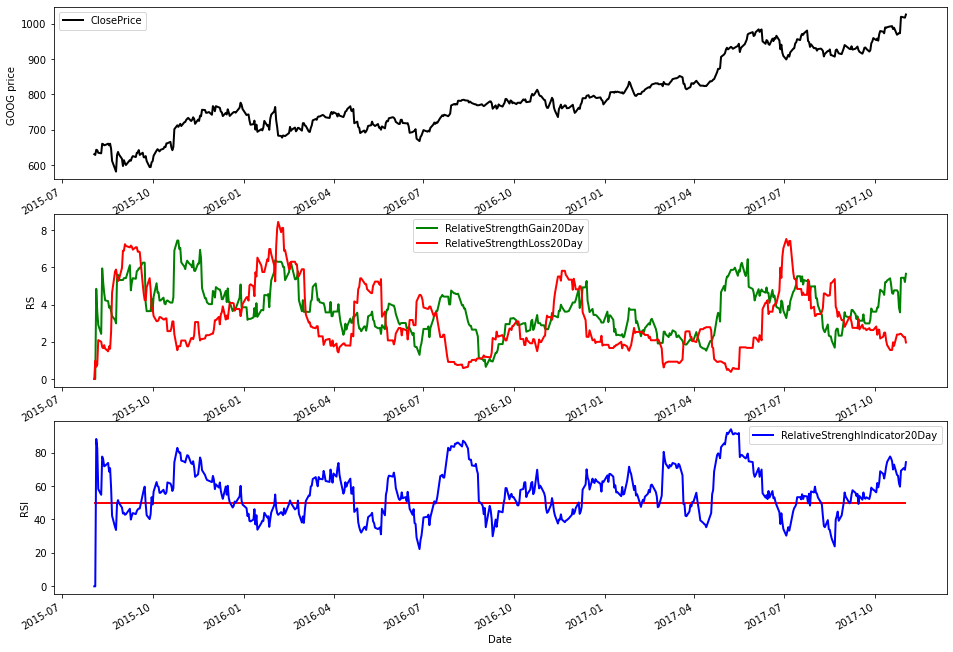

In [26]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(311, ylabel = 'GOOG price ')
close_price.plot(ax=ax1, color='black', lw=2, legend=True)
ax2 = fig.add_subplot(312, ylabel='RS')
rs_gain.plot(ax=ax2, color='g', lw=2, legend=True)
rs_loss.plot(ax=ax2, color='r', lw=2, legend=True)
ax3=fig.add_subplot(313, ylabel='RSI')
ax3.hlines(50, goog_data.index.values[0], goog_data.index.values[-1], lw=2, color='r')
rsi.plot(ax=ax3, color='b', lw=2, legend=True)